# Metric Convergence

MAE, MSE, and RMSE are the consistent counterpart of the L1, squared L2, and L2
**functional** norm respectively. So they must converge against their integral
if the resolution is refined.

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
import exponax as ex

In [3]:
# Should also work without double precision, but with longer floats we see convergence for longer
# jax.config.update("jax_enable_x64", True)

In [4]:
def get_difference(
    num_points, domain_extent, metric_fn, true_value, pred_fn, ref_fn=None
):
    grid_1d = ex.make_grid(1, domain_extent, num_points)
    u = pred_fn(grid_1d)
    if ref_fn is not None:
        u_ref = ref_fn(grid_1d)
        metric_result = metric_fn(u, u_ref, domain_extent=domain_extent)
    else:
        metric_result = metric_fn(u, domain_extent=domain_extent)
    return abs(metric_result - true_value)

In [5]:
num_points_range = 2 ** jnp.arange(4, 11)

2024-09-23 11:07:19.164501: W external/xla/xla/service/gpu/nvptx_compiler.cc:836] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version (12.6.68). Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


## Smooth Functions

For smooth functions, convergence over resolution $N$ must be exponential.

### MSE

https://www.wolframalpha.com/input?i=int_0%5E%282*pi%29+f%5E2+dx++with+f%28x%29+%3D+e%5E%28-100+*+%28x-1%29%5E2%29+*+sin%28x%29

In [6]:
true_value_smooth_mse = (
    0.0886137772936767597782376343064707483999019551036447917203998375
)
domain_extent_smooth_mse = 2 * jnp.pi
fn_smooth_mse = lambda x: jnp.exp(-100 * (x - 1) ** 2) * jnp.sin(x)

In [7]:
error_range_smooth_mse = [
    get_difference(
        num_points,
        domain_extent_smooth_mse,
        ex.metrics.MSE,
        true_value_smooth_mse,
        fn_smooth_mse,
    )
    for num_points in num_points_range
]

In [8]:
error_range_smooth_mse

[Array(0.08800498, dtype=float32),
 Array(0.03868547, dtype=float32),
 Array(0.00021834, dtype=float32),
 Array(2.9802322e-08, dtype=float32),
 Array(7.450581e-09, dtype=float32),
 Array(7.450581e-09, dtype=float32),
 Array(7.450581e-09, dtype=float32)]

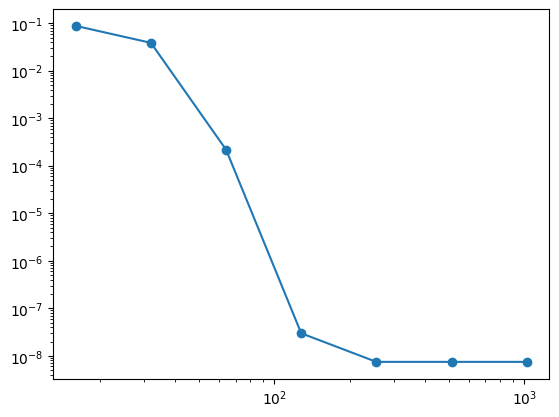

In [9]:
plt.loglog(num_points_range, error_range_smooth_mse, "-o")

### MAE

https://www.wolframalpha.com/input?i=int_0%5E%282*pi%29+abs%28f%29+dx++with+f%28x%29+%3D+e%5E%28-100+*+%28x-1%29%5E2%29+*+sin%28x%29

In [10]:
true_value_smooth_mae = (
    0.1487744473186810166740730299247331106126900314034849949126656085
)
domain_extent_smooth_mae = 2 * jnp.pi
fn_smooth_mae = lambda x: jnp.exp(-100 * (x - 1) ** 2) * jnp.sin(x)

In [11]:
error_range_smooth_mae = [
    get_difference(
        num_points,
        domain_extent_smooth_mae,
        ex.metrics.MAE,
        true_value_smooth_mae,
        fn_smooth_mae,
    )
    for num_points in num_points_range
]

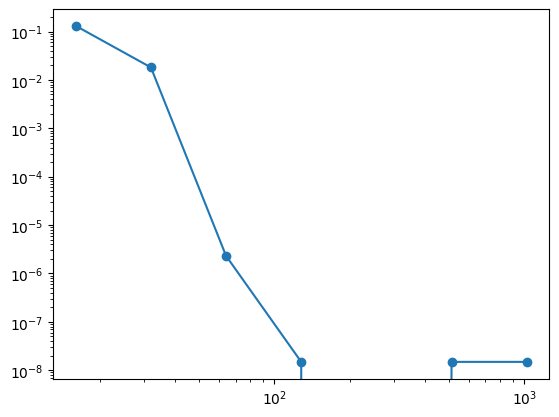

In [12]:
plt.loglog(num_points_range, error_range_smooth_mae, "-o")

### Sobolev H1 error

https://www.wolframalpha.com/input?i=int_0%5E%282*pi%29+f%5E2+%2B+%28derivative%28f%2C+x%29%29%5E2+dx++with+f%28x%29+%3D+e%5E%28-100+*+%28x-1%29%5E2%29+*+sin%28x%29

In [13]:
true_value_smooth_h1 = (
    9.0126572135271277501623951970738217197152721339833724216761316788
)
domain_extent_smooth_h1 = 2 * jnp.pi
fn_smooth_h1 = lambda x: jnp.exp(-100 * (x - 1) ** 2) * jnp.sin(x)

In [14]:
error_range_smooth_h1 = [
    get_difference(
        num_points,
        domain_extent_smooth_h1,
        ex.metrics.H1_MSE,
        true_value_smooth_h1,
        fn_smooth_h1,
    )
    for num_points in num_points_range
]

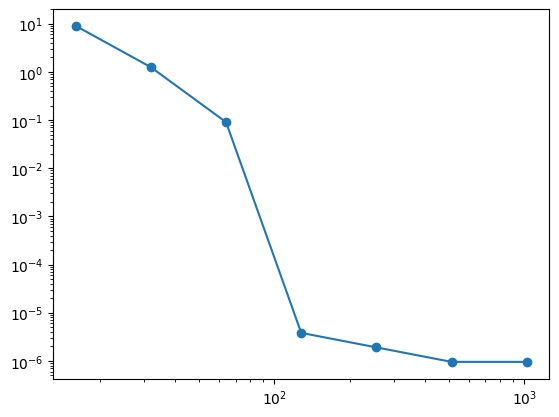

In [15]:
plt.loglog(num_points_range, error_range_smooth_h1, "-o")

## Non-Smooth

For non-smooth functions, convergence over resolution $N$ is only polynomially linear.

In [16]:
true_value_nonsmooth_mse = (
    0.0420412074249998476683389584173419174549303041521076984836046108
)
domain_extent_smooth_mse = 1.0  # Domain size that makes the function non-periodic!
fn_smooth_mse = lambda x: jnp.exp(-100 * (x - 1) ** 2) * jnp.sin(x)

In [17]:
error_range_nonsmooth_mse = [
    get_difference(
        num_points,
        domain_extent_smooth_mse,
        ex.metrics.MSE,
        true_value_nonsmooth_mse,
        fn_smooth_mse,
    )
    for num_points in num_points_range
]

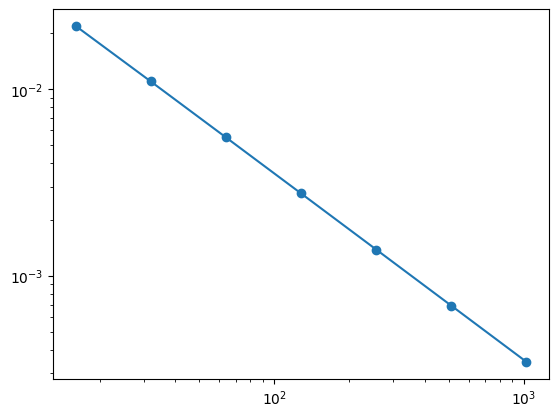

In [18]:
plt.loglog(num_points_range, error_range_nonsmooth_mse, "-o")